In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_regression_functions
import custom_models
from custom_regression_functions import *
from custom_models_extended import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
from custom_models_fingerprints import *

In [4]:
use_fingerprints = False

apply_scaffold_split = False

create_new_data = True

In [5]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "GNN"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_regression_random_gnn_permute_val2/model_gnn_conv"
    else:
        filename_basic = "results_regression_random_fp_permute_val2/model_gnn_conv"
else:
    if not use_fingerprints:
        filename_basic = "results_regression_scaffold_gnn_permute_val2/model_gnn_conv"
    else:
        filename_basic = "results_regression_scaffold_fp_permute_val2/model_gnn_conv"

apply_scaffold_split = False

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001

In [6]:
param_combinations = dict()

hidden_channels_list = [[256]]
linear_sizes_list = [[]]
gcn_layers_list = [4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

permute_layer_list = [[], [0,1], [1,2], [2,3], [0,1,2], [0,1,2,3]]
pre_act_permute_gcn_list = [False]
post_act_permute_gcn_list = [True]

#permute_index=permute_index, pre_act_permute_gcn=pre_act_permute_gcn, post_act_permute_gcn=post_act_permute_gcn


In [7]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list


#permute
param_combinations["permute_layer_list"] = permute_layer_list
param_combinations["pre_act_permute_gcn_list"] = pre_act_permute_gcn_list
param_combinations["post_act_permute_gcn_list"] = post_act_permute_gcn_list

In [8]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [9]:
batch_size = 64

In [10]:


if use_fingerprints:
    param_combinations_fp = dict()

    param_combinations_fp["radius"] = [2, 3]
    param_combinations_fp["fpSize"] = [1024, 2048]
    param_combinations_fp["linear_layers"] = [[2048], [2048, 1024, 512], [1024, 512], [1024]]
    param_combinations_fp["create_count_fp"] = [True, False]
    param_combinations_fp["apply_scaffold_split_list"] = apply_scaffold_split_list

    keys_fp = list(param_combinations_fp.keys())
    values_fp = list(param_combinations_fp.values())

    combinations_fp = list(itertools.product(*values_fp))


In [11]:
if use_fingerprints:

    combinations = combinations_fp
    keys = keys_fp
    values = values_fp

In [12]:
print(len(combinations))

18


In [13]:
#permute_index=[], pre_act_permute_gcn=False, post_act_permute_gcn=False

run: 0
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000017D55C6CC10>, <function global_max_pool at 0x0000017D55C6D5E0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.503734175364176 | Validation Loss 5.672144651412964
Epoch 10 | Train Loss 3.145129617055257 | Validation Loss 3.8134946823120117
Epoch 20 | Train Loss 2.305558760960897 | Validation Loss 2.816549599170685
Epoch 30 | Train Loss 2.630838163693746 | Validation Loss 2.8205028772354126
Epoch 40 | Train Loss 1.6435357332229614 | Validation Loss 1.9553239941596985
Epoch 50 | Train Loss 1.284413758913676 | Validation Loss 1.7229888439178467
Epoch 60 | Train Loss 1.3272501786549886 | Validation Loss 1.567388653755188
Epoch 70 | Train Loss 1.05253853003184 | Validation Loss 1.3686618208885193
Epoch 80 | Train Loss 0.9039321700731914 | Validation Loss 1.1459727883338928
Epoch 90 | Train Loss 0.8745915810267131 | Validation Loss 1.1913238167762756
Epoch 100 | Train Loss 0.979278294245402 | Validation Loss 1.098096787929535
Epoch 110 | Train Loss 0.7590765813986461 | Validation Loss 0.986312210559845
Epoch 120 | Train Loss 0.8860036949316661 | Validation Loss 0.98714229464530

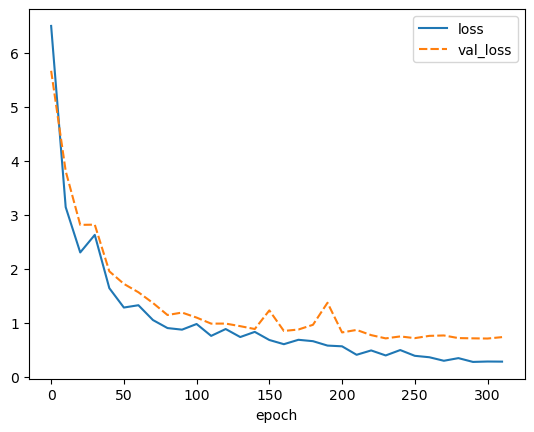

best weights loaded


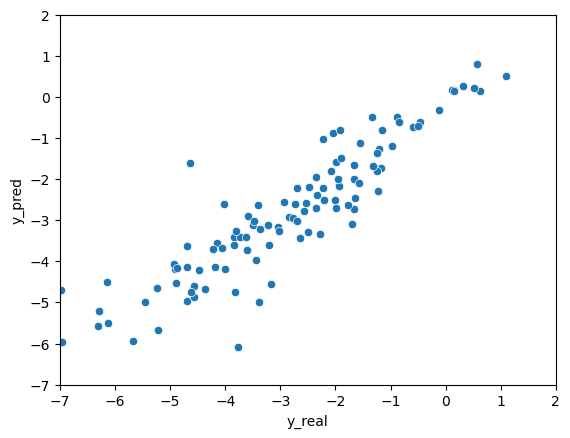

elapsed time: 95.03888177871704
run: 1
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000017D55C6CC10>, <function global_max_pool at 0x0000017D55C6D5E0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449
Epoch 0 | Train Loss 7.601966222127278 | Validation Loss 6.492654323577881
Epoch 10 | Train Loss 4.185631227493286 | Validation Loss 7.399414539337158
Epoch 20 | Train Loss 4.2433669408162435 | Validation Loss 6.4347825050354
Epoch 30 | Train Loss 3.927839501698812 | Validation Loss 6.019263029098511
Epoch 40 | Train Loss 3.565872804323832 | Validation Loss 6.375023603439331
Epoch 50 | Train Loss 3.415643843015035 | Validation Loss 5.854345798492432
Epoch 60 | Train Loss 3.625107463200887 | Validation Loss 5.07261848449707
Epoch 70 | Train Loss 3.6588802178700766 | Validation Loss 4.945298075675964
Epoch 80 | Train Loss 3.348285508155823 | Validation Loss 5.3756126165390015
Epoch 90 | Train Loss 3.3978120

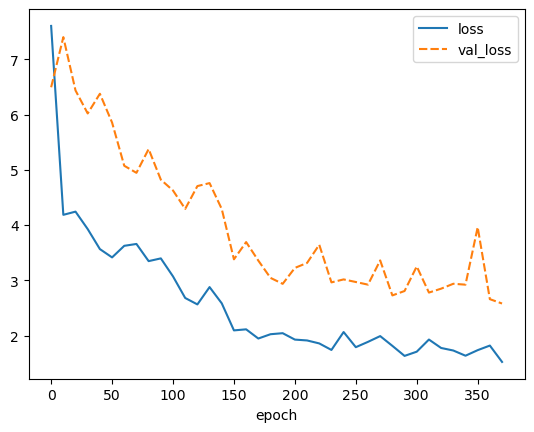

best weights loaded


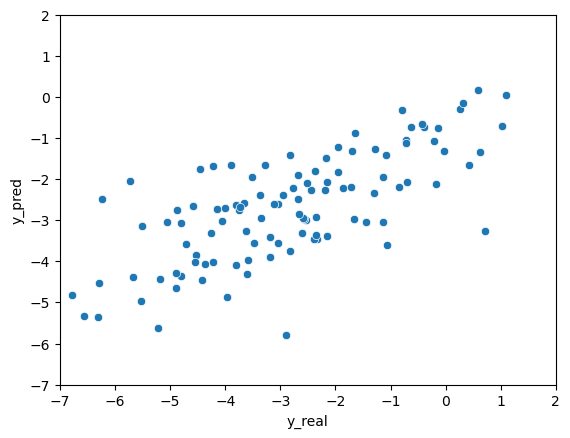

elapsed time: 125.52387499809265
run: 2
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000017D55C6CC10>, <function global_max_pool at 0x0000017D55C6D5E0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1, 2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449
Epoch 0 | Train Loss 8.376547781626384 | Validation Loss 5.738839387893677
Epoch 10 | Train Loss 4.070458809534709 | Validation Loss 3.673106551170349
Epoch 20 | Train Loss 3.5946795622507732 | Validation Loss 3.4715089797973633
Epoch 30 | Train Loss 3.730852794647217 | Validation Loss 3.2028855085372925
Epoch 40 | Train Loss 3.9736160119374593 | Validation Loss 2.8662705421447754
Epoch 50 | Train Loss 3.047475783030192 | Validation Loss 2.7541662454605103
Epoch 60 | Train Loss 2.6073711633682253 | Validation Loss 2.5159478187561035
Epoch 70 | Train Loss 2.644778537750244 | Validation Loss 2.324740171432495
Epoch 80 | Train Loss 2.276345403989156 | Validation Loss 1.8071481585502625
Epoch 90 | Train Loss 

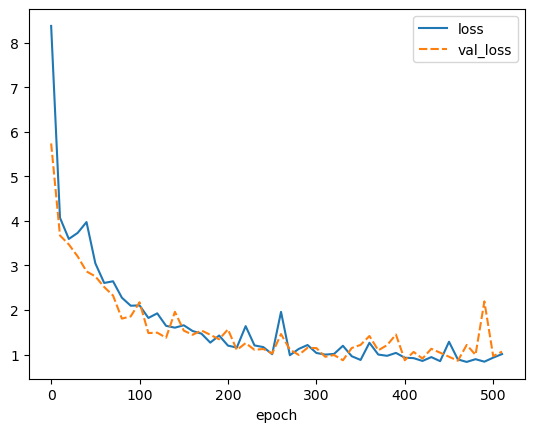

best weights loaded


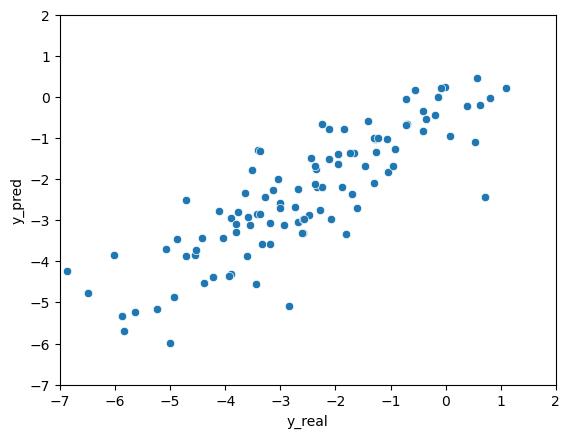

elapsed time: 163.80336785316467
run: 3
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000017D55C6CC10>, <function global_max_pool at 0x0000017D55C6D5E0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2, 3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449
Epoch 0 | Train Loss 12.484665075937906 | Validation Loss 10.903029918670654
Epoch 10 | Train Loss 4.203167025248209 | Validation Loss 5.317708492279053
Epoch 20 | Train Loss 3.7209464073181153 | Validation Loss 4.341185569763184
Epoch 30 | Train Loss 2.829655090967814 | Validation Loss 3.7233078479766846
Epoch 40 | Train Loss 2.544508918126424 | Validation Loss 3.07694149017334
Epoch 50 | Train Loss 2.642366401354472 | Validation Loss 3.0714887380599976
Epoch 60 | Train Loss 2.257533796628316 | Validation Loss 2.3687477111816406
Epoch 70 | Train Loss 2.149096941947937 | Validation Loss 2.1598793864250183
Epoch 80 | Train Loss 1.5808798591295878 | Validation Loss 1.8398556113243103
Epoch 90 | Train Loss 1

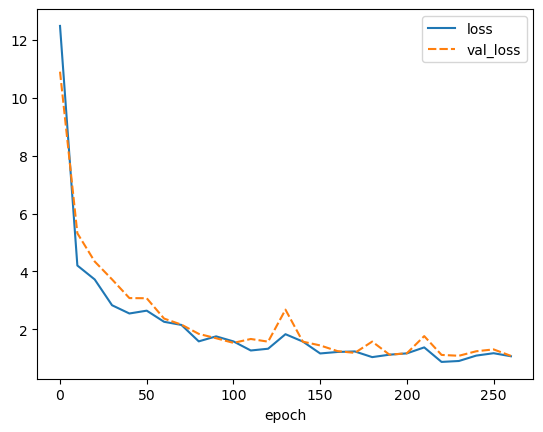

best weights loaded


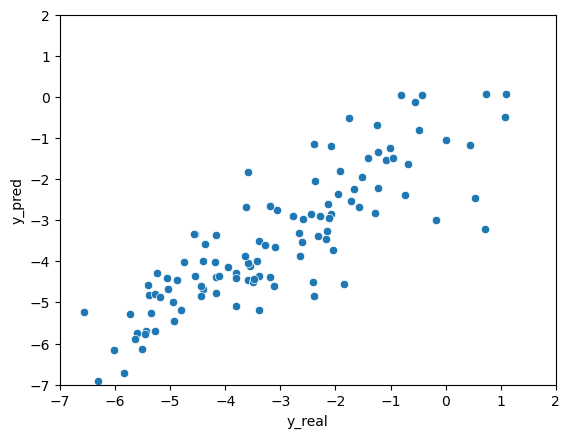

elapsed time: 82.91812777519226
run: 4
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000017D55C6CC10>, <function global_max_pool at 0x0000017D55C6D5E0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449
Epoch 0 | Train Loss 8.101491737365723 | Validation Loss 7.066740036010742
Epoch 10 | Train Loss 4.930281448364258 | Validation Loss 4.574782371520996
Epoch 20 | Train Loss 4.730255619684855 | Validation Loss 4.260767698287964
Epoch 30 | Train Loss 4.372432390848796 | Validation Loss 4.562382459640503
Epoch 40 | Train Loss 4.456206369400024 | Validation Loss 3.968371272087097
Epoch 50 | Train Loss 3.9452168623606365 | Validation Loss 4.098153233528137
Epoch 60 | Train Loss 3.9549164613087973 | Validation Loss 3.762743830680847
Epoch 70 | Train Loss 4.020406691233317 | Validation Loss 3.8552424907684326
Epoch 80 | Train Loss 3.7825044790903726 | Validation Loss 3.6946698427200317
Epoch 90 | Train Loss 3.51

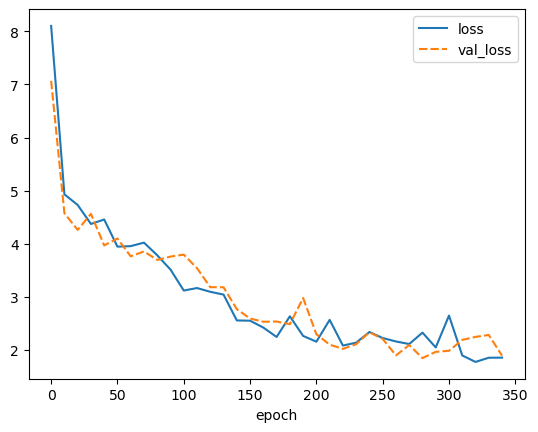

best weights loaded


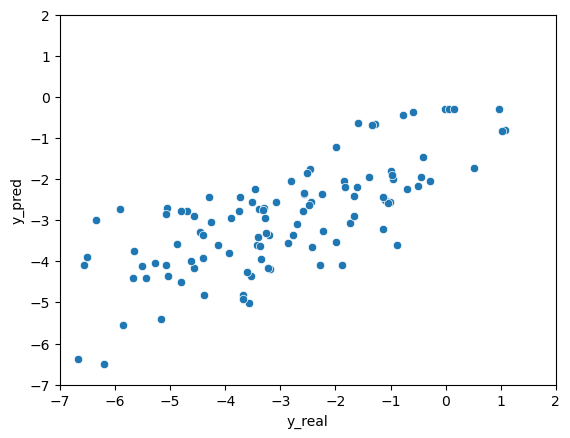

elapsed time: 115.7536678314209
run: 5
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000017D55C6CC10>, <function global_max_pool at 0x0000017D55C6D5E0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449
Epoch 0 | Train Loss 10.15114730199178 | Validation Loss 7.195352554321289
Epoch 10 | Train Loss 4.570147959391276 | Validation Loss 4.972796201705933
Epoch 20 | Train Loss 4.269100109736125 | Validation Loss 5.078127384185791
Epoch 30 | Train Loss 4.260122871398925 | Validation Loss 5.117531061172485
Epoch 40 | Train Loss 4.041400035222371 | Validation Loss 4.70810604095459
Epoch 50 | Train Loss 4.016420237223307 | Validation Loss 5.316609144210815
Epoch 60 | Train Loss 4.068483225504557 | Validation Loss 5.073009014129639
Epoch 70 | Train Loss 3.8375054836273192 | Validation Loss 4.839737892150879
Epoch 80 | Train Loss 3.9227675914764406 | Validation Loss 4.862044095993042
Epoch 90 | Train Loss 3.379424

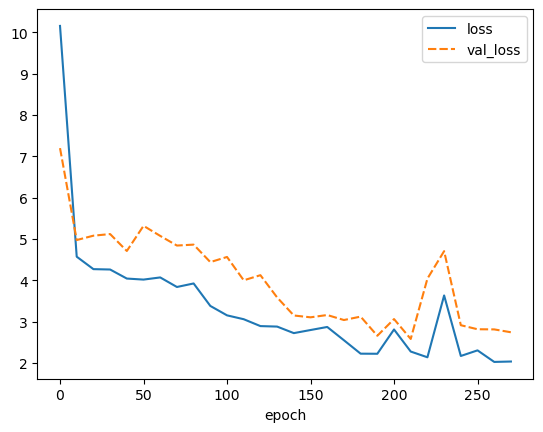

best weights loaded


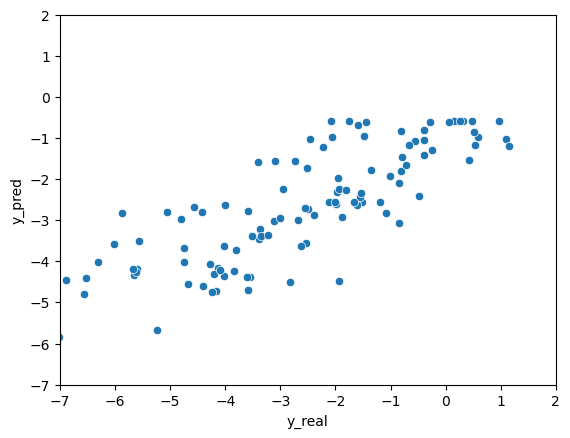

elapsed time: 98.92829537391663
run: 6
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000017D55C6CC10>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193
Epoch 0 | Train Loss 5.649365933736165 | Validation Loss 3.865846633911133
Epoch 10 | Train Loss 3.7988527615865073 | Validation Loss 2.8511576652526855
Epoch 20 | Train Loss 2.6701850573221844 | Validation Loss 3.637343645095825
Epoch 30 | Train Loss 2.659786407152812 | Validation Loss 1.7258167266845703
Epoch 40 | Train Loss 1.6462137301762898 | Validation Loss 1.871463119983673
Epoch 50 | Train Loss 1.320571784178416 | Validation Loss 1.3013713955879211
Epoch 60 | Train Loss 1.315619711081187 | Validation Loss 1.2820097208023071
Epoch 70 | Train Loss 1.2049978852272034 | Validation Loss 2.413406729698181
Epoch 80 | Train Loss 1.9099432071050009 | Validation Loss 1.1458083987236023
Epoch 90 | Train Loss

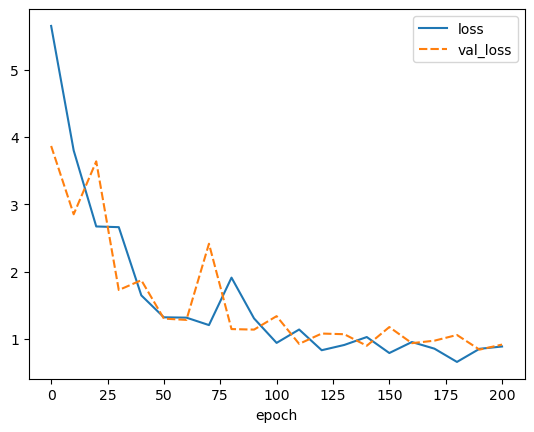

best weights loaded


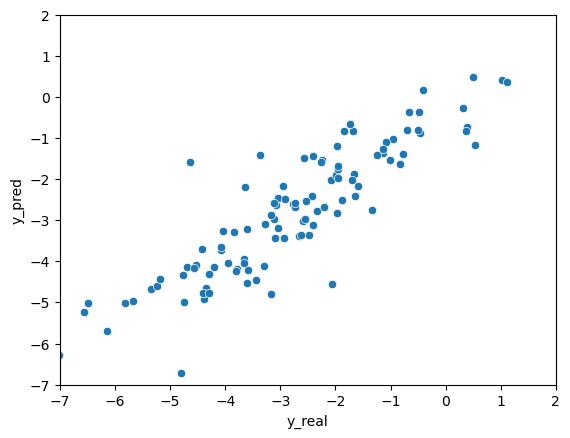

elapsed time: 54.31316828727722
run: 7
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000017D55C6CC10>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193
Epoch 0 | Train Loss 7.46528975168864 | Validation Loss 5.15837025642395
Epoch 10 | Train Loss 4.281323877970378 | Validation Loss 4.904635906219482
Epoch 20 | Train Loss 4.76453849474589 | Validation Loss 4.8272833824157715
Epoch 30 | Train Loss 4.261995522181193 | Validation Loss 4.530393123626709
Epoch 40 | Train Loss 3.9944433053334554 | Validation Loss 4.38015878200531
Epoch 50 | Train Loss 3.8572868665059405 | Validation Loss 4.210323810577393
Epoch 60 | Train Loss 3.6840782165527344 | Validation Loss 4.001250624656677
Epoch 70 | Train Loss 3.8416451454162597 | Validation Loss 4.187604188919067
Epoch 80 | Train Loss 3.3716314395268756 | Validation Loss 3.7072101831436157
Epoch 90 | Train Loss 3.7232

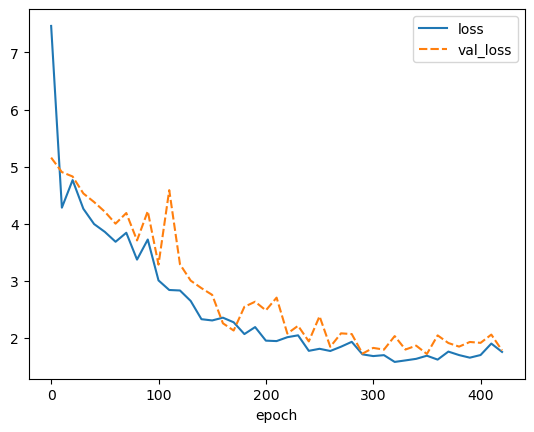

best weights loaded


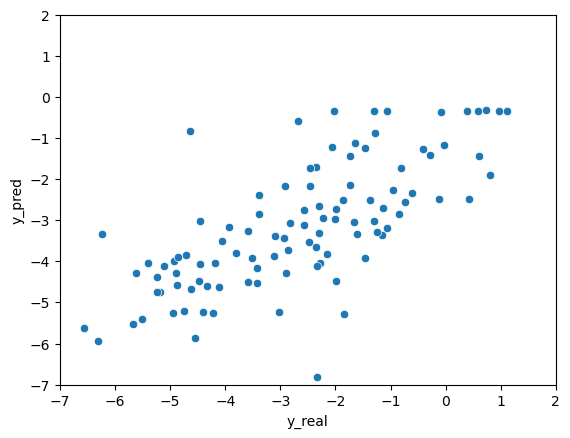

elapsed time: 131.60515427589417
run: 8
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000017D55C6CC10>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1, 2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193
Epoch 0 | Train Loss 7.835534858703613 | Validation Loss 6.587235450744629
Epoch 10 | Train Loss 4.124548625946045 | Validation Loss 4.420616626739502
Epoch 20 | Train Loss 3.820038906733195 | Validation Loss 4.3205955028533936
Epoch 30 | Train Loss 3.4978678544362385 | Validation Loss 3.587380886077881
Epoch 40 | Train Loss 2.847671969731649 | Validation Loss 2.9026103019714355
Epoch 50 | Train Loss 2.9070070107777912 | Validation Loss 3.220189929008484
Epoch 60 | Train Loss 3.477519456545512 | Validation Loss 3.0220022201538086
Epoch 70 | Train Loss 2.030627640088399 | Validation Loss 2.6895066499710083
Epoch 80 | Train Loss 1.8554078658421835 | Validation Loss 3.789199113845825
Epoch 90 | Train Loss 1.

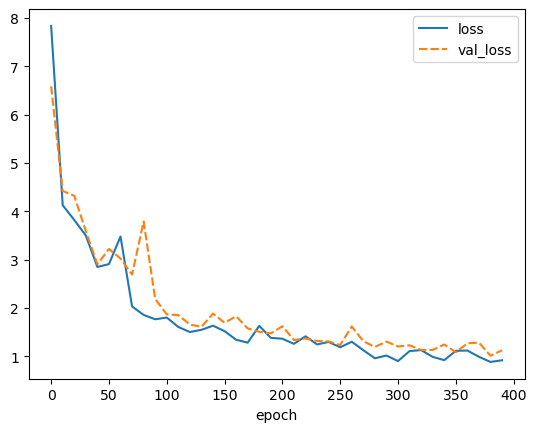

best weights loaded


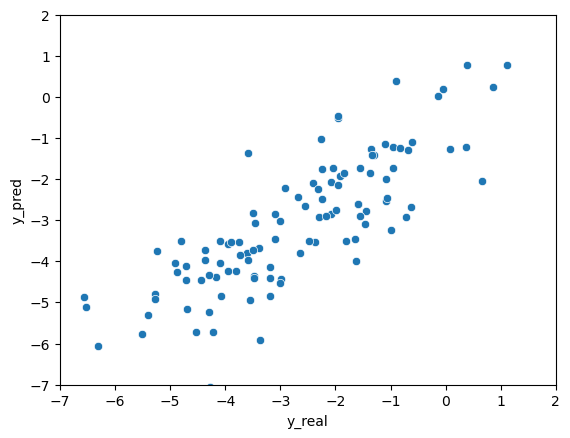

elapsed time: 127.23022985458374
run: 9
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000017D55C6CC10>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2, 3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193
Epoch 0 | Train Loss 12.438728841145833 | Validation Loss 10.88838529586792
Epoch 10 | Train Loss 4.35448849995931 | Validation Loss 3.8962392807006836
Epoch 20 | Train Loss 3.9906004746754964 | Validation Loss 3.445875406265259
Epoch 30 | Train Loss 3.5387046337127686 | Validation Loss 3.6827813386917114
Epoch 40 | Train Loss 3.1675284544626874 | Validation Loss 2.749032735824585
Epoch 50 | Train Loss 2.616476472218831 | Validation Loss 3.455146074295044
Epoch 60 | Train Loss 2.344155478477478 | Validation Loss 2.981484532356262
Epoch 70 | Train Loss 2.596961949268977 | Validation Loss 2.3717066049575806
Epoch 80 | Train Loss 1.6268352667490642 | Validation Loss 2.013485312461853
Epoch 90 | Train Loss 2.

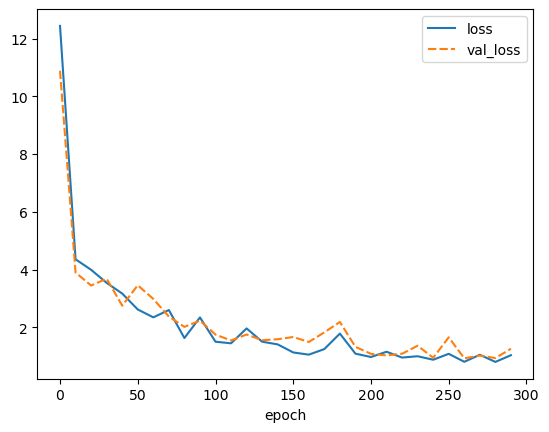

best weights loaded


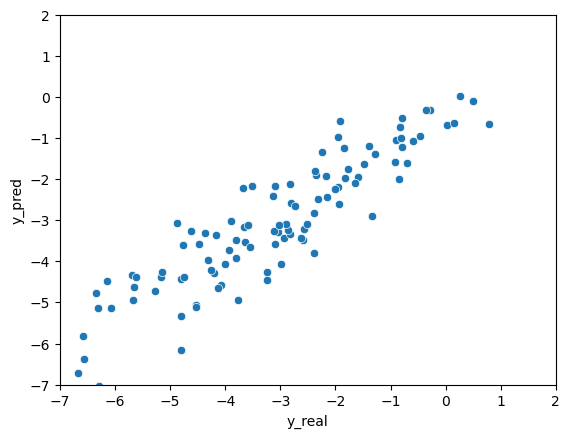

elapsed time: 90.72208547592163
run: 10
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000017D55C6CC10>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193
Epoch 0 | Train Loss 9.775154908498129 | Validation Loss 4.289978265762329
Epoch 10 | Train Loss 4.905324300130208 | Validation Loss 3.9856858253479004
Epoch 20 | Train Loss 4.929206625620524 | Validation Loss 4.016548752784729
Epoch 30 | Train Loss 4.627321561177571 | Validation Loss 3.6137354373931885
Epoch 40 | Train Loss 4.412544361750284 | Validation Loss 3.619444489479065
Epoch 50 | Train Loss 4.237962404886882 | Validation Loss 3.371903896331787
Epoch 60 | Train Loss 4.334805536270141 | Validation Loss 3.5949119329452515
Epoch 70 | Train Loss 4.288032897313436 | Validation Loss 3.14749014377594
Epoch 80 | Train Loss 3.6527586221694945 | Validation Loss 2.945580840110779
Epoch 90 | Train Loss 3.5684

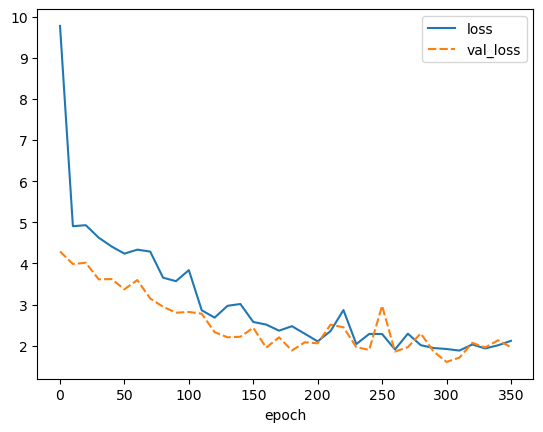

best weights loaded


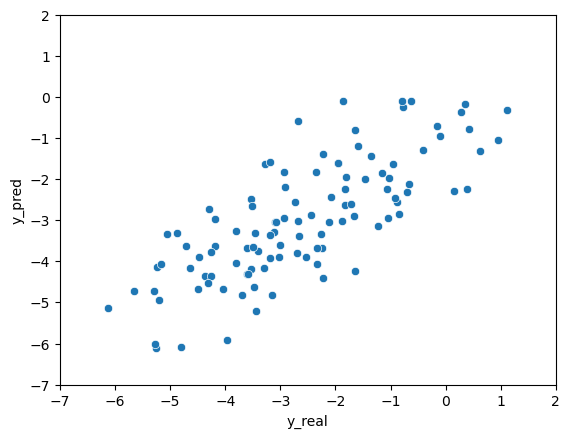

elapsed time: 112.66852712631226
run: 11
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000017D55C6CC10>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193
Epoch 0 | Train Loss 14.637600517272949 | Validation Loss 10.107517719268799
Epoch 10 | Train Loss 4.70122971534729 | Validation Loss 4.384042739868164
Epoch 20 | Train Loss 4.528207651774088 | Validation Loss 4.740255832672119
Epoch 30 | Train Loss 4.476464239756266 | Validation Loss 4.1646164655685425
Epoch 40 | Train Loss 4.015787347157796 | Validation Loss 3.866727352142334
Epoch 50 | Train Loss 4.560253047943116 | Validation Loss 5.11847186088562
Epoch 60 | Train Loss 4.092103401819865 | Validation Loss 4.733319520950317
Epoch 70 | Train Loss 4.072178824742635 | Validation Loss 4.0670483112335205
Epoch 80 | Train Loss 4.1638201713562015 | Validation Loss 3.931319832801819
Epoch 90 | Train Loss 3.7304

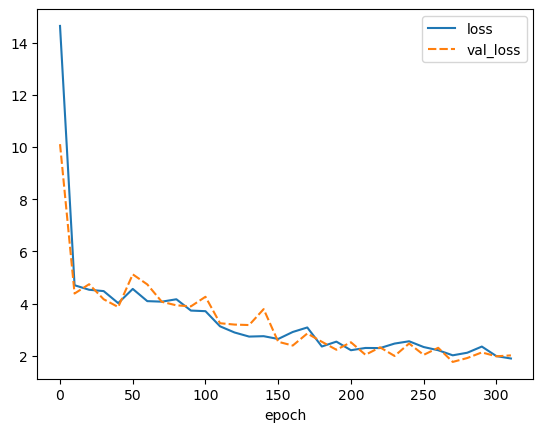

best weights loaded


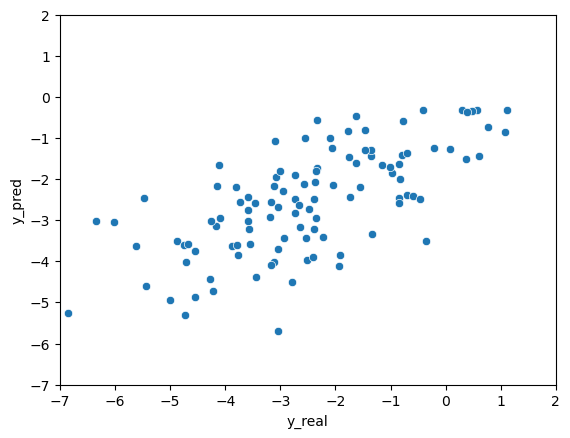

elapsed time: 117.23727226257324
run: 12
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000017D55C6D5E0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193
Epoch 0 | Train Loss 5.987538973490397 | Validation Loss 5.46672511100769
Epoch 10 | Train Loss 3.3141374905904133 | Validation Loss 3.1931058168411255
Epoch 20 | Train Loss 2.8385011831919353 | Validation Loss 2.8809049129486084
Epoch 30 | Train Loss 1.639487632115682 | Validation Loss 2.0736639499664307
Epoch 40 | Train Loss 1.6824342250823974 | Validation Loss 1.802554965019226
Epoch 50 | Train Loss 1.3197303732236227 | Validation Loss 1.695474088191986
Epoch 60 | Train Loss 1.4314468383789063 | Validation Loss 2.8399845361709595
Epoch 70 | Train Loss 1.2582974870999655 | Validation Loss 1.5311104655265808
Epoch 80 | Train Loss 0.8947774628798167 | Validation Loss 1.3740239143371582
Epoch 90 | Train Lo

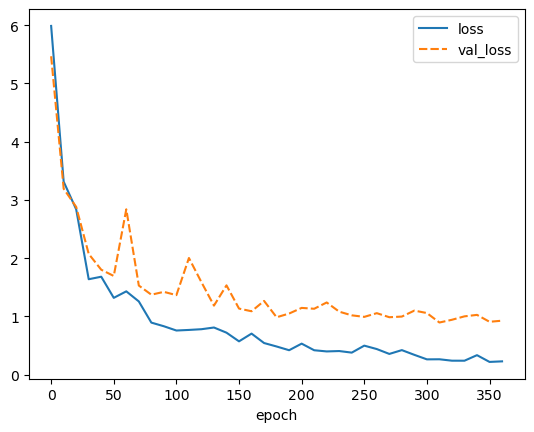

best weights loaded


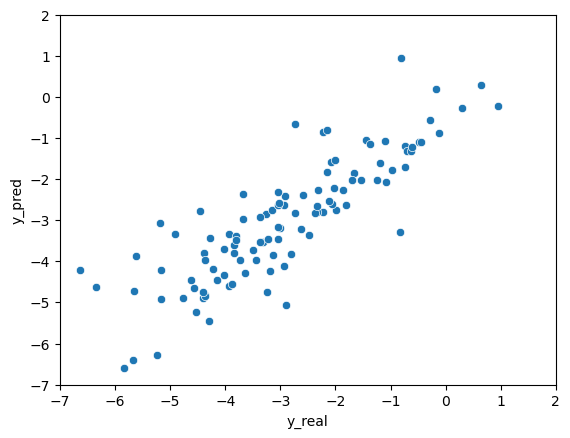

elapsed time: 89.89240574836731
run: 13
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000017D55C6D5E0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193
Epoch 0 | Train Loss 7.0447981039683025 | Validation Loss 6.296175956726074
Epoch 10 | Train Loss 4.392133196194966 | Validation Loss 4.816640138626099
Epoch 20 | Train Loss 4.246151749293009 | Validation Loss 5.0243000984191895
Epoch 30 | Train Loss 4.024250666300456 | Validation Loss 4.842266798019409
Epoch 40 | Train Loss 3.900679286321004 | Validation Loss 4.622682571411133
Epoch 50 | Train Loss 3.820069169998169 | Validation Loss 4.7188252210617065
Epoch 60 | Train Loss 3.563587474822998 | Validation Loss 4.2260273694992065
Epoch 70 | Train Loss 3.6892191886901857 | Validation Loss 4.318615198135376
Epoch 80 | Train Loss 3.4151330312093098 | Validation Loss 4.33841347694397
Epoch 90 | Train Loss 3.27

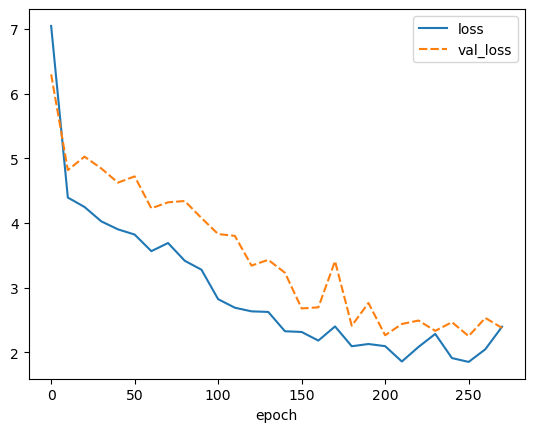

best weights loaded


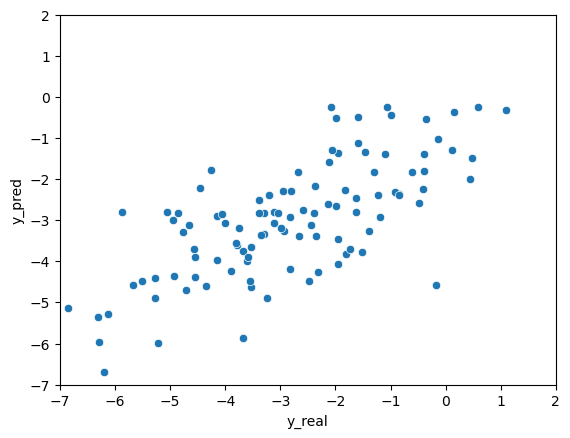

elapsed time: 80.18686723709106
run: 14
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000017D55C6D5E0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1, 2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193
Epoch 0 | Train Loss 9.019050772984823 | Validation Loss 6.788423538208008
Epoch 10 | Train Loss 4.153157711029053 | Validation Loss 3.535979747772217
Epoch 20 | Train Loss 3.7860159556070965 | Validation Loss 3.06559956073761
Epoch 30 | Train Loss 3.212043205897013 | Validation Loss 2.9449045658111572
Epoch 40 | Train Loss 3.1321752071380615 | Validation Loss 2.6612820625305176
Epoch 50 | Train Loss 2.3847607215245565 | Validation Loss 2.4472270607948303
Epoch 60 | Train Loss 2.161633825302124 | Validation Loss 2.2891939878463745
Epoch 70 | Train Loss 2.5224952856699625 | Validation Loss 3.12182080745697
Epoch 80 | Train Loss 2.216355554262797 | Validation Loss 2.145147919654846
Epoch 90 | Train Loss 1.9

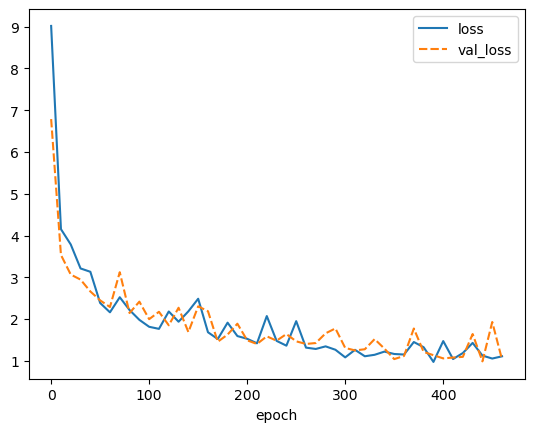

best weights loaded


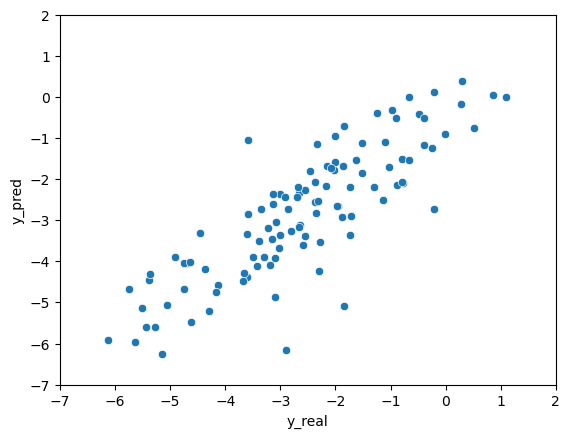

elapsed time: 133.95194292068481
run: 15
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000017D55C6D5E0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2, 3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193
Epoch 0 | Train Loss 9.852958504358927 | Validation Loss 5.4001452922821045
Epoch 10 | Train Loss 4.434175062179565 | Validation Loss 4.182311058044434
Epoch 20 | Train Loss 3.4712743957837424 | Validation Loss 3.936210036277771
Epoch 30 | Train Loss 2.951271422704061 | Validation Loss 3.1693698167800903
Epoch 40 | Train Loss 2.4835993528366087 | Validation Loss 2.8280599117279053
Epoch 50 | Train Loss 2.3492871046066286 | Validation Loss 2.6646808385849
Epoch 60 | Train Loss 1.8748629013697307 | Validation Loss 2.2102580070495605
Epoch 70 | Train Loss 1.7269829511642456 | Validation Loss 2.003856658935547
Epoch 80 | Train Loss 2.600795662403107 | Validation Loss 2.217822790145874
Epoch 90 | Train Loss 1.

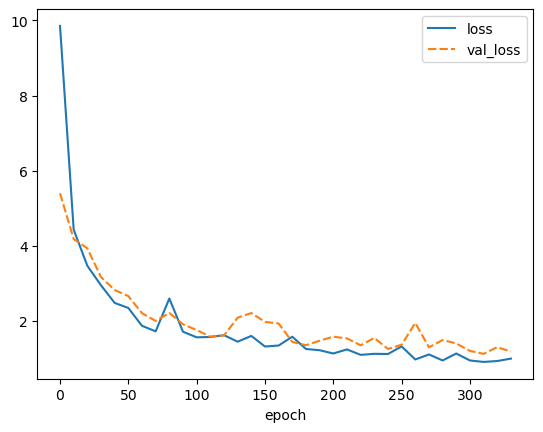

best weights loaded


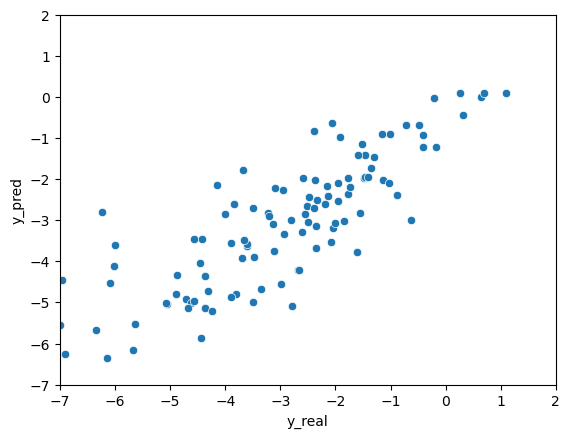

elapsed time: 98.68629717826843
run: 16
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000017D55C6D5E0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193
Epoch 0 | Train Loss 8.567024898529052 | Validation Loss 5.319977045059204
Epoch 10 | Train Loss 4.37305744489034 | Validation Loss 4.927261590957642
Epoch 20 | Train Loss 4.201335096359253 | Validation Loss 4.904989719390869
Epoch 30 | Train Loss 4.194109773635864 | Validation Loss 4.850561857223511
Epoch 40 | Train Loss 4.612998803456624 | Validation Loss 5.188502073287964
Epoch 50 | Train Loss 4.596698919932048 | Validation Loss 5.366379976272583
Epoch 60 | Train Loss 3.6563316663106282 | Validation Loss 3.868149995803833
Epoch 70 | Train Loss 4.285160493850708 | Validation Loss 3.820197105407715
Epoch 80 | Train Loss 3.8682961304982504 | Validation Loss 3.848244071006775
Epoch 90 | Train Loss 4.228087

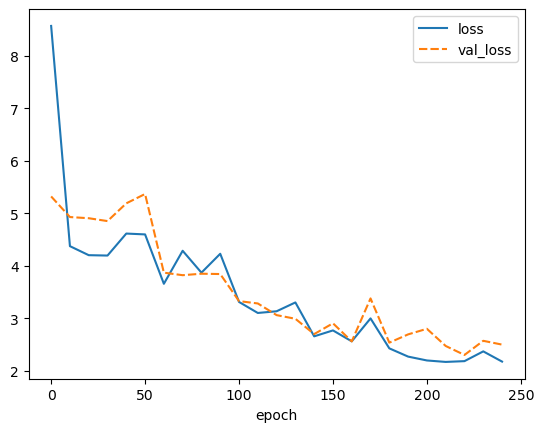

best weights loaded


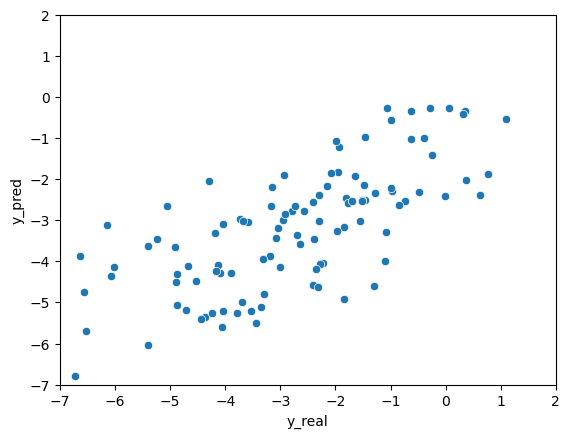

elapsed time: 86.11917638778687
run: 17
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000017D55C6D5E0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193
Epoch 0 | Train Loss 12.73028637568156 | Validation Loss 12.291799545288086
Epoch 10 | Train Loss 4.680716896057129 | Validation Loss 5.100597620010376
Epoch 20 | Train Loss 4.355156787236532 | Validation Loss 4.734963417053223
Epoch 30 | Train Loss 4.04091362953186 | Validation Loss 4.286203742027283
Epoch 40 | Train Loss 4.012949419021607 | Validation Loss 4.702892780303955
Epoch 50 | Train Loss 3.5489811579386394 | Validation Loss 4.793962240219116
Epoch 60 | Train Loss 3.953361479441325 | Validation Loss 4.509141206741333
Epoch 70 | Train Loss 3.723400417963664 | Validation Loss 4.506226062774658
Epoch 80 | Train Loss 3.6368191401163736 | Validation Loss 3.964738130569458
Epoch 90 | Train Loss 3.40690

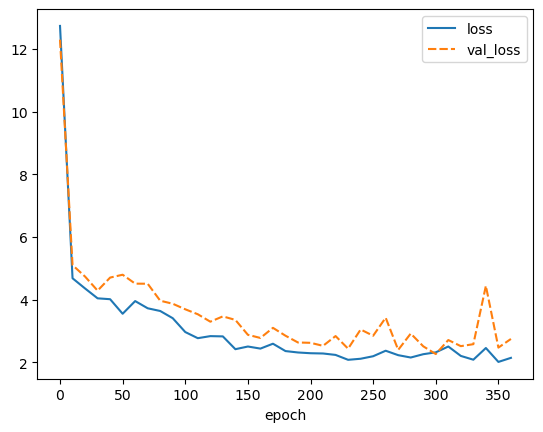

best weights loaded


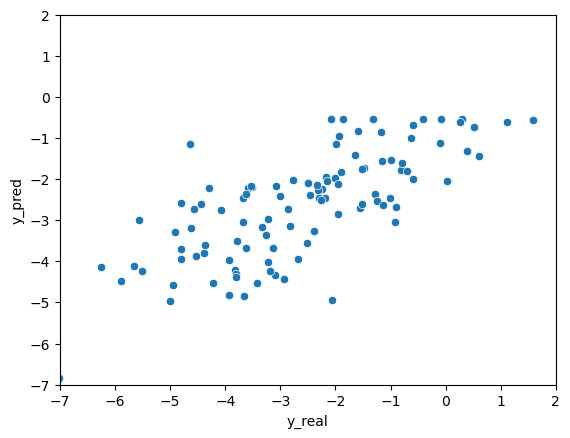

elapsed time: 131.4087154865265


In [14]:
import time

counter = 0
for combination in combinations:
    t0 = time.time()
    print(f"run: {counter}")
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])

        permute_index=combination_dict["permute_layer_list"]
        pre_act_permute_gcn=combination_dict["pre_act_permute_gcn_list"]
        post_act_permute_gcn=combination_dict["post_act_permute_gcn_list"]
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 



    if create_new_data:
        data, data_y = load_esol()

        pytorch_graph_list = create_pytorch_graph(data)

        processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

        train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, test_percentage = 0.1, apply_scaffold_split = apply_scaffold_split )
        loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

    else:

        import dill as pickle

        if apply_scaffold_split:
            loader_file = 'datasets_scaffold_reg_esol.pkl'
        else: 
            loader_file = 'datasets_reg_esol.pkl'
        with open(loader_file, 'rb') as file: 
            
            
            loaders = pickle.load(file) 
        
            print(loaders) 

        train_dataset, test_dataset, val_dataset = loaders


        if use_fingerprints:
            morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

            loader = DataLoader(morgan_data_train, 
                                batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(morgan_data_test, 
                                    batch_size=batch_size, shuffle=True)

        else:
            #loader, test_loader = create_dataloader(train_dataset, test_dataset, batch_size=batch_size)
            loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)
        

    if not use_fingerprints:
        model, device, optimizer, loss_fn = initialize_regression_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate, permute_index=permute_index, pre_act_permute_gcn=pre_act_permute_gcn, post_act_permute_gcn=post_act_permute_gcn)


        model, best_model_weights, losses, val_losses = regression_train(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression(model, test_loader, device, best_model_weights)

    else:

        model, device, optimizer, loss_fn = initialize_regression_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train_fingerprint(model, loader, val_loader, device, loss_fn, optimizer, log_time=100, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression_fingerprint(model, test_loader, device, best_model_weights)


    plt.show()

    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")
    
    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #regression
    save_dict["mean_mse"] = mean_mse
    save_dict["mean_l1"] = mean_l1

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names

        save_dict["permute_index"] = permute_index
        save_dict["pre_act_permute_gcn"] = pre_act_permute_gcn
        save_dict["post_act_permute_gcn"] = post_act_permute_gcn


    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp



    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    